In [6]:
###########################################################################################
# This notebook its to complete the task B of the assignment 3

#Read the  file table_HD-209458-b-Xue-et-al.-2024.csv and write a new file HD-209458-b_spectrum_assignment3_taskB.dat with the following format: wavelength rp_rs^2 error. 

import csv

input_file = 'table_HD-209458-b-Xue-et-al.-2024.csv'
output_file = 'HD-209458-b_spectrum_assignment3_taskB.dat' #output file as .dat file format

with open(input_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header row
    data = list(csvreader)

with open(output_file, 'w') as outfile: #write the output file and calculate the rp_rs^2 and errors
    for row in data:
        wavelength = float(row[0])
        rp_rs = float(row[1])
        error_plus = float(row[2])
        error_minus = float(row[3])
        
        rp_rs_squared = rp_rs ** 2
        error = (error_plus + abs(error_minus)) / 2 #average of the errors to get one single error based on both columnsn in the input file from the webpage
        
        outfile.write(f"{wavelength:.2f} {rp_rs_squared:.8f} {error:.8f}\n")

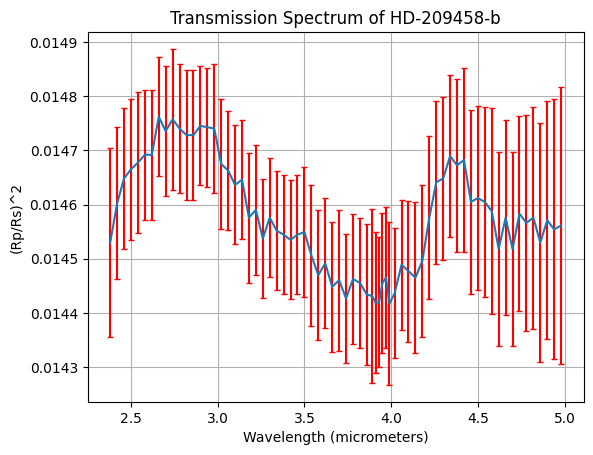

In [6]:
#Plot the spectrum of the exoplanet HD-209458-b and save the plot as HD-209458-b_spectrum_assignment3.png

import matplotlib.pyplot as plt

input_file = 'HD-209458-b_spectrum_assignment3_taskB.dat'
output_image = 'HD-209458-b_spectrum_assignment3.png'

# Read the data from the file
wavelengths = []
rp_rs_squared = []
errors = []

with open(input_file, 'r') as infile:
    for line in infile:
        parts = line.split()
        wavelengths.append(float(parts[0]))
        rp_rs_squared.append(float(parts[1]))
        errors.append(float(parts[2]))

# Plot the data
plt.errorbar(wavelengths, rp_rs_squared, yerr=errors, ecolor='r', capsize=2)
plt.xlabel('Wavelength (micrometers)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Spectrum of HD-209458-b')
plt.grid(True)

# Save the plot to a file
plt.savefig(output_image)
plt.show()